In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from collections import Counter

In [14]:
image = cv2.imread(r"C:\Users\kabil\Desktop\stoke-prediction\processing\dataset\region.jpg",1)

In [ ]:
plt.imshow(image);

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape
w_new = int(100 * w / max(w, h) )
h_new = int(100 * h / max(w, h) )

image = cv2.resize(image, (w_new, h_new));

In [5]:
image_array = image.reshape((image.shape[0] * image.shape[1], 3))

In [6]:
clf = KMeans(n_clusters = 20)
clf.fit(image_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
center_colors = clf.cluster_centers_
print(center_colors)

[[ 13.18518519  13.18518519  13.18518519]
 [204.52       204.52       204.52      ]
 [107.31009615 107.31009615 107.31009615]
 [  0.93135752   0.93135752   0.93135752]
 [254.25038402 254.25038402 254.25038402]
 [127.26041667 127.26041667 127.26041667]
 [ 57.15384615  57.15384615  57.15384615]
 [ 95.53821656  95.53821656  95.53821656]
 [146.47191011 146.47191011 146.47191011]
 [113.64351852 113.64351852 113.64351852]
 [134.47142857 134.47142857 134.47142857]
 [ 73.42105263  73.42105263  73.42105263]
 [101.68348624 101.68348624 101.68348624]
 [163.38636364 163.38636364 163.38636364]
 [233.48780488 233.48780488 233.48780488]
 [182.33333333 182.33333333 182.33333333]
 [122.4863388  122.4863388  122.4863388 ]
 [ 87.72535211  87.72535211  87.72535211]
 [ 35.1         35.1         35.1       ]
 [118.48773006 118.48773006 118.48773006]]


In [8]:
r_colors = [ int(each[0]) for each in center_colors]
r_colors.sort()

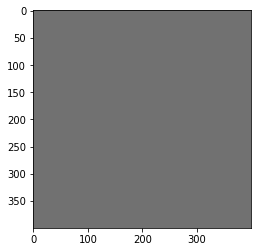

In [9]:
nimage = np.full((400,400,3),113)
plt.imshow(nimage);

In [10]:
len(r_colors)

20

In [11]:
pairs = []
for i in range(len(r_colors)-1):
    pairs.append((r_colors[i],r_colors[i+1]))
    

In [15]:
frame = image.copy()

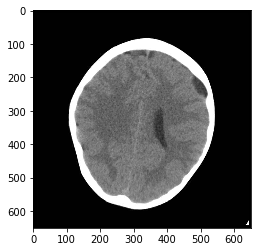

In [16]:
plt.imshow(frame)

In [ ]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower_blue = np.array([101, 101, 101])
upper_blue = np.array([106,106, 106])

mask = cv2.inRange(hsv, lower_blue, upper_blue)

result = cv2.bitwise_and(frame, frame, mask = mask)

plt.imshow( frame)
plt.show()
plt.imshow( mask)
plt.show()
plt.imshow(result)
plt.show()

In [ ]:
for i in range(frame.shape[0]):
    for j in range(frame.shape[1]):
        for each in pairs:
            if frame[i][j][0] < each[0]:
                print(frame[i][j][0])